# Actividad
| Nombre  | Matrícula |
|---------|-----------|
| Josephine Esposito | A00827145 |
| Mauricio Maqueo Huerta | A01620649 |
| Guillermo Tafoya Milo| A01633790 | 

# Entregar 
Archivo PDF de la actividad y la liga de la actividad en su repostitorio.

# Nota: 
Esta actividad se evaluará de acuerdo a la rúbrica en Canvas.

Al integrante que no participe en la actividad no se le tomará en cuenta para la calificación.

El límite para entregar las actividades es el viernes antes de las 23:59.

# Importante: 
- Colocar nombre en ejes en gráficas
- Nombre en gráficas 
- Conclusiones con el nombre de cada alumno
- Contestar cada pregunta


**Gastos en seguro**

Nuestro objetivo será construir un modelo que nos permita estimar los gastos de seguro dependiendo de edad,sexo, indice de masa corporal, numero de hijos, si se fuma, región.

El dataset consta de las columnas: 
- age: edad del beneficiario principal
- sex: female o male 
- bmi: indice de masa corporal
- children: numero de niños que estan cubiertos con la poliza. 
- smoke: si fuma el beneficiario si/no
- region: región en dónde vive el beneficiario. Estos datos son de Estados Unidos. Regiones disponibles: northeast, southeast, southwest, northwest
- charges: costo del seguro.


Referencia de dataset: 
https://github.com/stedy/Machine-Learning-with-R-datasets/blob/master/insurance.csv

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error

1.a. Carga los datos del archivo insurance.csv 

In [ ]:
df = pd.read_csv("data/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


1.b. Crea unas columnas con las siguientes caracteristicas:
- fuma: 1 si el bvalor de smoke es "yes" y 0 si el valor de smoke es "no" 
- region: si es northeast - 0 , southeast- 1, southwest- 2, northwest - 3
- sexo: 0 si es "male" y 1 si es "female"

In [ ]:
# One hot encoding
fuma_one_hot = pd.get_dummies(df['smoker'], prefix='smoker')
gender_one_hot = pd.get_dummies(df['sex'], prefix='sex')
# Region encoding [northeast - 0 , southeast- 1, southwest- 2, northwest - 3]
region_encoding = {'northeast': 0, 'southeast': 1, 'southwest': 2, 'northwest': 3}
region_encoding = df['region'].map(region_encoding)

2. Generar una(s) grafica(s) para visuaizar cómo se relaciona cada columna de costo en seguro contra otras variables.

Text(0.5, 1.0, 'Gender vs Charges')

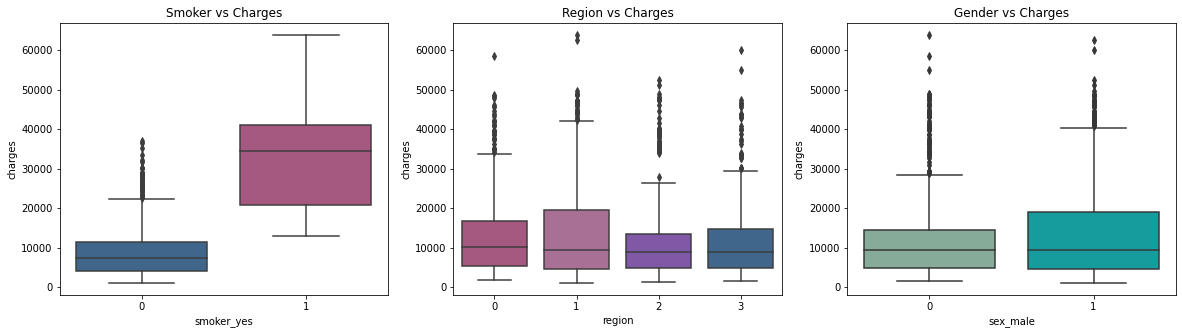

In [ ]:
# Boxplot of all variables
from turtle import title


charges = df['charges']

fig, ax = plt.subplots(1, 3, figsize=(20, 5))
sns.boxplot(x=fuma_one_hot['smoker_yes'], y=charges, ax=ax[0], palette=[(0.2, 0.4, 0.6, 0.6), (0.7, 0.3, 0.5, 0.6)])
ax[0].set_title('Smoker vs Charges')
sns.boxplot(x=region_encoding, y=charges, ax=ax[1], palette=[(0.7, 0.3, 0.5, 0.6), (0.7, 0.4, 0.6, 0.6), (0.5, 0.3, 0.7, 0.6), (0.2, 0.4, 0.6, 0.6)])
ax[1].set_title('Region vs Charges')
sns.boxplot(x=gender_one_hot['sex_male'], y=charges, ax=ax[2], palette=[(0.5, 0.7, 0.6, 0.6), (0, 0.7, 0.7, 0.6)])
ax[2].set_title('Gender vs Charges')


3. ¿ Qué conclusiones puedes obtener de las graficas anteriores? <br>



Gracias a estas tablas podemos ver:
* que las personas que fuman, gastan más de las que no,
* que la región en la que vive no afecta mucho su costo en seguro
* y que el sexo afecta muy poco el costo

4. **Regresión lineal**. En su forma más simple, consiste en asumir que una variable $x$ y una variable $y$ presentan una relación lineal de la forma:

$$ y \approx \beta_0 + \beta_1 \cdot x$$

¿Cuál es el valor de beta_0 , beta_1 y el Score  para **Edad vs Costo** , **Indice de masa corporal vs Costo** , **Niños vs Costo** y otros?

In [ ]:
# Correlation matrix
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


### Lineal regression models with one variable

BMI vs cost
Beta 0:  [2228.39494088]
Beta 1:  [[357.09343567]]
R2 Score:  0.05608883605147186
Mean squared error:  150204547.95456302
Mean absolute error:  9276.717029711594
Mean squared log error:  0.9444855098796148


<AxesSubplot:title={'center':'BMI vs cost'}, xlabel='Test Case', ylabel='Cost'>

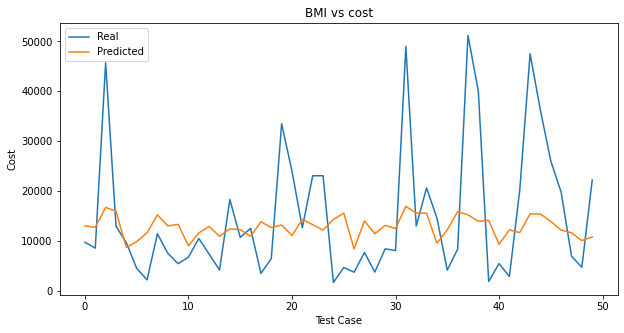

In [ ]:
# BMI vs cost
X = df['bmi'].values.reshape(-1,1)
y = charges.values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor_bmi = LinearRegression()
regressor_bmi.fit(X_train, y_train)
y_pred_bmi = regressor_bmi.predict(X_test)
print('BMI vs cost')
print('Beta 0: ', regressor_bmi.intercept_)
print('Beta 1: ', regressor_bmi.coef_)
bmi_r2 = r2_score(y_test, y_pred_bmi)
print('R2 Score: ', bmi_r2)
print('Mean squared error: ', mean_squared_error(y_test, y_pred_bmi))
print('Mean absolute error: ', mean_absolute_error(y_test, y_pred_bmi))
print('Mean squared log error: ', mean_squared_log_error(y_test, y_pred_bmi))
# Save predictions vs real values
df_bmi = pd.DataFrame({'Real': y_test.flatten(), 'Predicted': y_pred_bmi.flatten()})
# Plot predictions vs real values
df_bmi.head(50).plot(figsize=(10,5), title='BMI vs cost', xlabel='Test Case', ylabel='Cost')


Age vs cost
Beta 0:  [3882.85867889]
Beta 1:  [[238.37156961]]
R2 Score:  0.12539120236863355
Mean squared error:  139176465.01367894
Mean absolute error:  9147.177402778987
Mean squared log error:  0.7590197788972474


<AxesSubplot:title={'center':'Age vs cost'}, xlabel='Test Case', ylabel='Cost'>

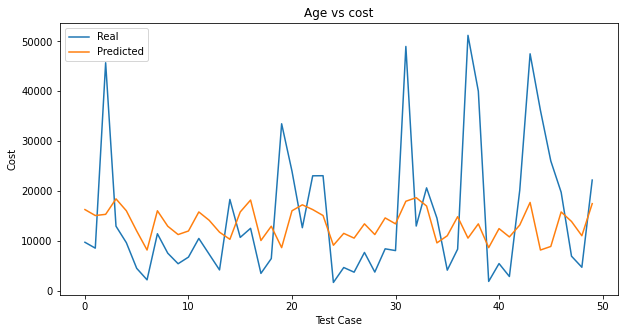

In [ ]:
# Age vs cost
X = df['age'].values.reshape(-1,1)
y = charges.values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor_age = LinearRegression()
regressor_age.fit(X_train, y_train)
y_pred_age = regressor_age.predict(X_test)
print('Age vs cost')
print('Beta 0: ', regressor_age.intercept_)
print('Beta 1: ', regressor_age.coef_)
age_r2 = r2_score(y_test, y_pred_age)
print('R2 Score: ', age_r2)
print('Mean squared error: ', mean_squared_error(y_test, y_pred_age))
print('Mean absolute error: ', mean_absolute_error(y_test, y_pred_age))
print('Mean squared log error: ', mean_squared_log_error(y_test, y_pred_age))
# Save predictions vs real values
df_age = pd.DataFrame({'Real': y_test.flatten(), 'Predicted': y_pred_age.flatten()})
# Plot predictions vs real values
df_age.head(50).plot(figsize=(10,5), title='Age vs cost', xlabel='Test Case', ylabel='Cost')

Children vs cost
Beta 0:  [12299.95705187]
Beta 1:  [[834.90108609]]
R2 Score:  -0.006091928026903837
Mean squared error:  160099370.59951591
Mean absolute error:  9537.108810804426
Mean squared log error:  0.9737316344436844


<AxesSubplot:title={'center':'Children vs cost'}, xlabel='Test Case', ylabel='Cost'>

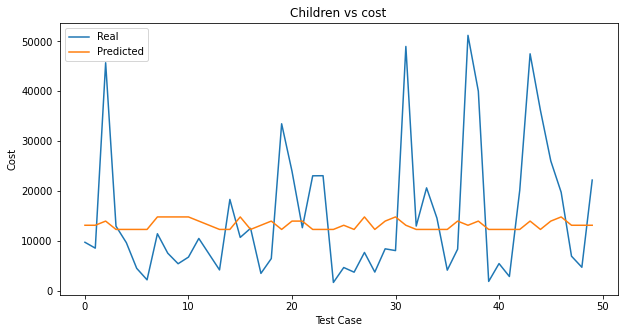

In [ ]:
# Children vs cost
X = df['children'].values.reshape(-1,1)
y = charges.values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor_children = LinearRegression()
regressor_children.fit(X_train, y_train)
y_pred_children = regressor_children.predict(X_test)
print('Children vs cost')
print('Beta 0: ', regressor_children.intercept_)
print('Beta 1: ', regressor_children.coef_)
children_r2 = r2_score(y_test, y_pred_children)
print('R2 Score: ', children_r2)
print('Mean squared error: ', mean_squared_error(y_test, y_pred_children))
print('Mean absolute error: ', mean_absolute_error(y_test, y_pred_children))
print('Mean squared log error: ', mean_squared_log_error(y_test, y_pred_children))
# Save predictions vs real values
df_children = pd.DataFrame({'Real': y_test.flatten(), 'Predicted': y_pred_children.flatten()})
# Plot predictions vs real values
df_children.head(50).plot(figsize=(10,5), title='Children vs cost', xlabel='Test Case', ylabel='Cost')

Smoker vs cost
Beta 0:  [8479.30935706]
Beta 1:  [[23070.33693093]]
R2 Score:  0.6734292727177782
Mean squared error:  51967187.52792912
Mean absolute error:  5510.9079742567
Mean squared log error:  0.48307041051951705


<AxesSubplot:title={'center':'Smoker vs cost'}, xlabel='Test Case', ylabel='Cost'>

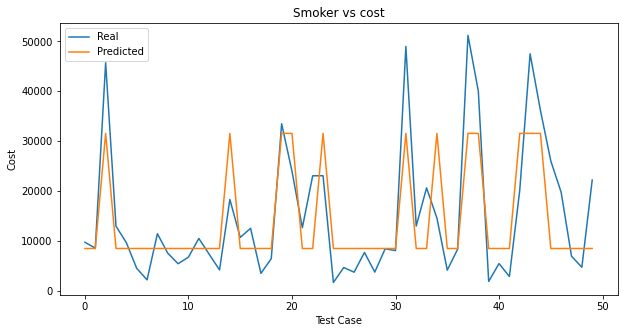

In [ ]:
# Smoker vs cost
X = fuma_one_hot['smoker_yes'].values.reshape(-1,1)
y = charges.values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor_smoker = LinearRegression()
regressor_smoker.fit(X_train, y_train)
y_pred_smoker = regressor_smoker.predict(X_test)
print('Smoker vs cost')
print('Beta 0: ', regressor_smoker.intercept_)
print('Beta 1: ', regressor_smoker.coef_)
smoker_r2 = r2_score(y_test, y_pred_smoker)
print('R2 Score: ', smoker_r2)
print('Mean squared error: ', mean_squared_error(y_test, y_pred_smoker))
print('Mean absolute error: ', mean_absolute_error(y_test, y_pred_smoker))
print('Mean squared log error: ', mean_squared_log_error(y_test, y_pred_smoker))
# Save predictions vs real values
df_smoker = pd.DataFrame({'Real': y_test.flatten(), 'Predicted': y_pred_smoker.flatten()})
# Plot predictions vs real values
df_smoker.head(50).plot(figsize=(10,5), title='Smoker vs cost', xlabel='Test Case', ylabel='Cost')

Region vs cost
Beta 0:  [14225.00596399]
Beta 1:  [[-683.82745415]]
R2 Score:  -0.003766937998517461
Mean squared error:  159729395.02389947
Mean absolute error:  9422.943850474894
Mean squared log error:  0.9864538172238368


<AxesSubplot:title={'center':'Region vs cost'}, xlabel='Test Case', ylabel='Cost'>

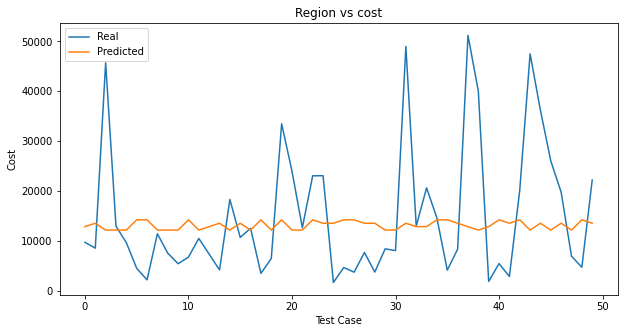

In [ ]:
# Region vs cost
X = region_encoding.values.reshape(-1,1)
y = charges.values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor_region = LinearRegression()
regressor_region.fit(X_train, y_train)
y_pred_region = regressor_region.predict(X_test)
print('Region vs cost')
print('Beta 0: ', regressor_region.intercept_)
print('Beta 1: ', regressor_region.coef_)
region_r2 = r2_score(y_test, y_pred_region)
print('R2 Score: ', region_r2)
print('Mean squared error: ', mean_squared_error(y_test, y_pred_region))
print('Mean absolute error: ', mean_absolute_error(y_test, y_pred_region))
print('Mean squared log error: ', mean_squared_log_error(y_test, y_pred_region))
# Save predictions vs real values
df_region = pd.DataFrame({'Real': y_test.flatten(), 'Predicted': y_pred_region.flatten()})
# Plot predictions vs real values
df_region.head(50).plot(figsize=(10,5), title='Region vs cost', xlabel='Test Case', ylabel='Cost')

Gender vs cost
Beta 0:  [12713.49291958]
Beta 1:  [[990.18477416]]
R2 Score: 0.007005383507528995
Mean squared error:  158015195.9085205
Mean absolute error:  9427.586234819915
Mean squared log error:  0.9834865158120563


<AxesSubplot:title={'center':'Sex vs Charges'}, xlabel='Test Case', ylabel='Cost'>

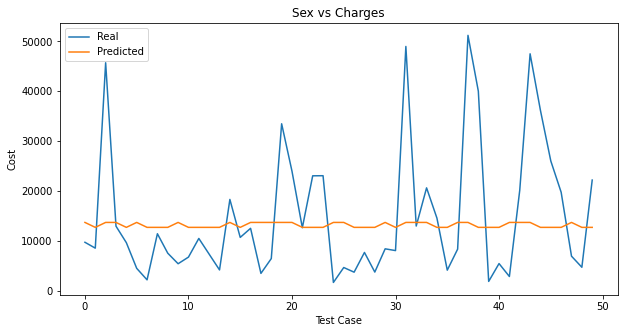

In [ ]:
# Gender vs cost
X = gender_one_hot['sex_male'].values.reshape(-1,1)
y = charges.values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor_gender = LinearRegression()
regressor_gender.fit(X_train, y_train)
y_pred_gender = regressor_gender.predict(X_test)
print('Gender vs cost')
print('Beta 0: ', regressor_gender.intercept_)
print('Beta 1: ', regressor_gender.coef_)
gender_r2 = r2_score(y_test, y_pred_gender)
print('R2 Score:', gender_r2)
print('Mean squared error: ', mean_squared_error(y_test, y_pred_gender))
print('Mean absolute error: ', mean_absolute_error(y_test, y_pred_gender))
print('Mean squared log error: ', mean_squared_log_error(y_test, y_pred_gender))
# Save predictions vs real values
df_gender = pd.DataFrame({'Real': y_test.flatten(), 'Predicted': y_pred_gender.flatten()})
# Plot predictions vs real values
df_gender.head(50).plot(figsize=(10,5), title='Sex vs Charges', xlabel='Test Case', ylabel='Cost')

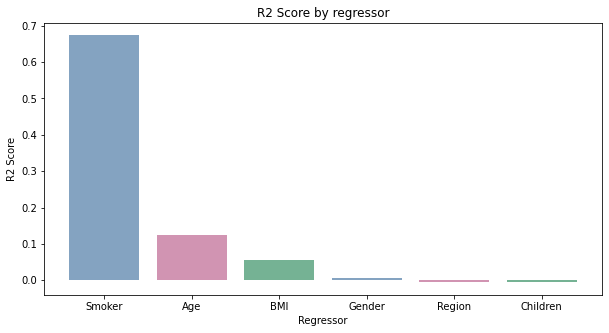

In [ ]:
# Order the regressors by R2 score
regressors = [regressor_bmi, regressor_age, regressor_children, regressor_smoker, regressor_region, regressor_gender]
regressors_names = ['BMI', 'Age', 'Children', 'Smoker', 'Region', 'Gender']
regressors_r2 = [bmi_r2, age_r2, children_r2, smoker_r2, region_r2, gender_r2]
regressors_r2, regressors_names = zip(*sorted(zip(regressors_r2, regressors_names)))
regressors_r2 = regressors_r2[::-1]
regressors_names = regressors_names[::-1]
plt.figure(figsize=(10,5))
plt.bar(regressors_names, regressors_r2, color=[(0.2, 0.4, 0.6, 0.6), (0.7, 0.3, 0.5, 0.6), (0.1, 0.5, 0.3, 0.6), (0.2, 0.4, 0.6, 0.6), (0.7, 0.3, 0.5, 0.6), (0.1, 0.5, 0.3, 0.6)])
plt.title('R2 Score by regressor')
plt.xlabel('Regressor')
plt.ylabel('R2 Score')
plt.show()

5. ¿Cuál de los modelos es mejor de acuerdo al score ordenalos del mejor al peor?

1. Smoker vs Charges
2. Age vs Charges
3. BMI vs Charges
4. Gender vs Charges
5. Region vs Charges
5. Children vs Charges

6.  **Regresión lineal múltiple**. Como ahora vamos a incluir más de una variable, el modelo se rescribe a :

$$ \hat{y} = \hat{\beta}_0 + \hat{\beta}_1 \cdot x_1 + \hat{\beta}_2 \cdot x_2 + \hat{\beta}_3\cdot x_3 + \ldots \epsilon $$

Elige  las diferentes combinaciones de variables. Ejemplo: Redes y Youtube vs Ventas 

¿Cuál es el valor de beta_0, betas_1 , beta_2 , el score y el score ajustado de de 5 combinaciones . Ejemplo: **Edad, Niños, Region vs Costo** ?

Multiple linear regression
Beta 0:  [1.05582053]
Beta 1:  [[   319.85165066    254.84728952    432.29014099 -11790.39120905
   11790.39120905    -62.42291896     12.96714943    -12.96714943]]
R2 Score:  0.7980619120055226


<AxesSubplot:title={'center':'Multiple linear regression'}, xlabel='Test Case', ylabel='Cost'>

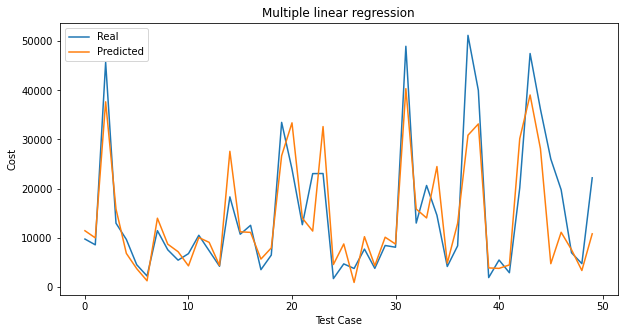

In [ ]:
# Now use a multiple linear regression to predict the cost, using also teh encoded categorical variables
X = df[['bmi', 'age', 'children']]
X = pd.concat([X, fuma_one_hot, region_encoding, gender_one_hot], axis=1)
y = charges.values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print('Multiple linear regression')
print('Beta 0: ', regressor.intercept_)
print('Beta 1: ', regressor.coef_)
r2 = r2_score(y_test, y_pred)
print('R2 Score: ', r2)
# Save predictions vs real values
df_final = pd.DataFrame({'Real': y_test.flatten(), 'Predicted': y_pred.flatten()})
# Plot predictions vs real values
df_final.head(50).plot(figsize=(10,5), title='Multiple linear regression', xlabel='Test Case', ylabel='Cost')

Multiple linear regression with only the 3 best variables
Beta 0:  [240.70922733]
Beta 1:  [[   321.83997719    257.04066602 -11812.61724417  11812.61724417]]
R2 Score:  0.7945500805653087


<AxesSubplot:title={'center':'Multiple linear regression with only the 3 best variables'}, xlabel='Test Case', ylabel='Cost'>

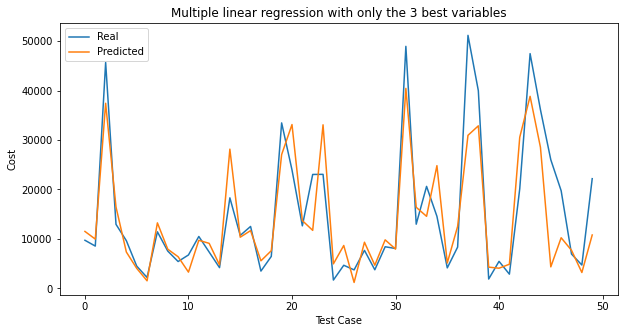

In [ ]:
# Using only the 3 best variables (BMI, Age, Smoker)
X = df[['bmi', 'age']]
X = pd.concat([X, fuma_one_hot], axis=1)
y = charges.values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor_significant_variables = LinearRegression()
regressor_significant_variables.fit(X_train, y_train)
y_pred_significant_variables = regressor_significant_variables.predict(X_test)
print('Multiple linear regression with only the 3 best variables')
print('Beta 0: ', regressor_significant_variables.intercept_)
print('Beta 1: ', regressor_significant_variables.coef_)
r2_significant_variables = r2_score(y_test, y_pred_significant_variables)
print('R2 Score: ', r2_significant_variables)
# Save predictions vs real values
df_final_significant_variables = pd.DataFrame({'Real': y_test.flatten(), 'Predicted': y_pred_significant_variables.flatten()})
# Plot predictions vs real values
df_final_significant_variables.head(50).plot(figsize=(10,5), title='Multiple linear regression with only the 3 best variables', xlabel='Test Case', ylabel='Cost')


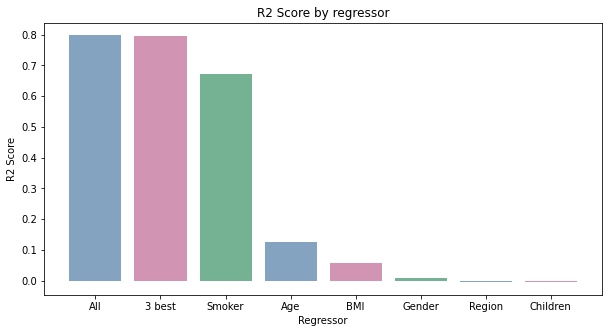

In [ ]:
# Classify again the regressors by R2 score
regressors = [regressor, regressor_significant_variables, regressor_bmi, regressor_age, regressor_children, regressor_smoker, regressor_gender, regressor_region]
regressors_names = ['All', '3 best', 'BMI', 'Age', 'Children', 'Smoker', 'Gender', 'Region']
regressors_r2 = [r2, r2_significant_variables, bmi_r2, age_r2, children_r2, smoker_r2, gender_r2, region_r2]
regressors_r2, regressors_names = zip(*sorted(zip(regressors_r2, regressors_names)))
regressors_r2 = regressors_r2[::-1]
regressors_names = regressors_names[::-1]
plt.figure(figsize=(10,5))
plt.bar(regressors_names, regressors_r2, color=[(0.2, 0.4, 0.6, 0.6), (0.7, 0.3, 0.5, 0.6), (0.1, 0.5, 0.3, 0.6), (0.2, 0.4, 0.6, 0.6), (0.7, 0.3, 0.5, 0.6), (0.1, 0.5, 0.3, 0.6), (0.2, 0.4, 0.6, 0.6), (0.7, 0.3, 0.5, 0.6)])
plt.title('R2 Score by regressor')
plt.xlabel('Regressor')
plt.ylabel('R2 Score')
plt.show()

 7. ¿Cuál modelo es el que nos conviene elegir?

El modelo de regresión múltiple, pues tiene el R2 mayor.<br>
Entre el que usa todas las variables y el que usa solo 3, depende de los recursos disponibles; pues la fidelidad del que usa solo las variables más significativas no se diferencia tantpo en r2.


# ¿Cuál es la ecuación final de tu modelo?

In [ ]:
# The equation for the multiple linear regression is:
print('The equation for the multiple linear regression is:')
print('y = ', regressor.intercept_[0], '+', regressor.coef_[0][0], '* bmi +', regressor.coef_[0][1], '* age +', regressor.coef_[0][2], '* children +', regressor.coef_[0][3], '* smoker_yes +', regressor.coef_[0][4], '* northeast +', regressor.coef_[0][5], '* northwest +', regressor.coef_[0][6], '* southeast +', regressor.coef_[0][7], '* southwest')

The equation for the multiple linear regression is:
y =  1.0558205307352182 + 319.85165066139893 * bmi + 254.84728951632763 * age + 432.2901409910011 * children + -11790.39120904669 * smoker_yes + 11790.391209046691 * northeast + -62.42291896002777 * northwest + 12.967149429758045 * southeast + -12.967149429760228 * southwest


In [ ]:
# The equation for the multiple linear regression with only the 3 best variables is:
print('The equation for the multiple linear regression with only the 3 best variables is:')
print('y = ', regressor_significant_variables.intercept_[0], '+', regressor_significant_variables.coef_[0][0], '* bmi +', regressor_significant_variables.coef_[0][1], '* age +', regressor_significant_variables.coef_[0][2], '* smoker_yes')

The equation for the multiple linear regression with only the 3 best variables is:
y =  240.70922732869622 + 321.83997719073795 * bmi + 257.04066601676027 * age + -11812.617244168618 * smoker_yes


# Conclusiones

A00827145 - Josephine Esposito
    
Gracias a esta materia aprendí como construir modelos estadísticos basados en variables y como interpretar las posibles interacciones entre estas. Aunque no es la primera vez que manejo una gran cantidad de datos, ya que a lo largo de mis semestres me fue posible aprender el utilizo de herramientas de base de datos como MySQL, o lenguajes de programación para el manejo de datos científicos como R, nunca vi como aplicar estos conocimientos a lenguajes más utilizados como Python o herramientas como Google Colaboratory.

Con los conocimientos adquiridos de esta semana, se como aplicar estos modelos estadísticos a algoritmos sencillos y complejos que manejan gran cantidades de datos. Aunque estos conocimientos son simples y no adecuados para los proyectos que estoy realizando, me sirvirá como base para aprender más sobre este tema y entender que puedo hacer para aplicarlo a proyectos y retos más complejos.


---

A01620649 - Mauricio Maqueo Huerta :

Gracias a esta semana tec pude desarrollar más mis habilidades y de igual manera poder aplicar mis conocimientos en el área de Data Science, logrando ver que tanto mi conocimiento en el área como mi capacidad en el uso de las herramientas aplicadas es la mas optima sintiéndose más confiado y seguro al momento de aplicar este conocimiento.


---


A01633790 - Guillermo Tafoya Milo :
En esta semana tec logre reforzar y volver a aplicar métodos que ya había visto en el pasado pero que sin embargo siempre son buenos de volver a ver, siendo una semana bastante sencilla pero que sin embargo no le resta importancia.

Dado a que estos conocimientos fueron bastante sencillos estoy seguro de que podría aplicarlos de manera correcta y ya en un ambiente laboral más estructurado.


---

# Guardar el resultado como pdf


* Escribe aquí abajo la liga de tu repositorio.

* [🔗 Liga al repositorio de GitHub](https://github.com/ltchycrane/Semana_Tec.git)

* Exporta el notebook a formato HTML.

In [ ]:
! jupyter nbconvert --to HTML '/content/drive/MyDrive/SemanaTec/arte-analitica/6.3 - Actividad Regresion Linea.ipynb'

"jupyter" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


* Haz doble clic en el archivo nuevo que se creó dentro de la carpeta `arte-analitica` y en la parte superior derecha dale clic en **imprimir**

* Imprime el archivo como *PDF* y súbelo a Canvas.